In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime

#### Analysis is done on Amazon  historical trading data ( just an example ) . Data Sample size: 3 years -  2013, 2014, 2015.  The Idea is to check if there is any significant volume transaction happended on a single day and also there is spike ( up/down) on the share price of Amazon on the same day, then we highlight ( red flag) that day for more scrutiny. The same Anaysis can be done on any organization 

In [131]:
AMZN_df = pd.read_csv("AMZN.csv")
AMZN_df.Date = AMZN_df.Date.astype(str)
AMZN_df['Date'] = AMZN_df['Date'].astype('datetime64[ns]')

AMZN_df.index = AMZN_df.Date
AMZN_df.head()

AMZN_df = AMZN_df.loc['2013-01-01':'2016-01-01']
AMZN_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Share price graph for three years

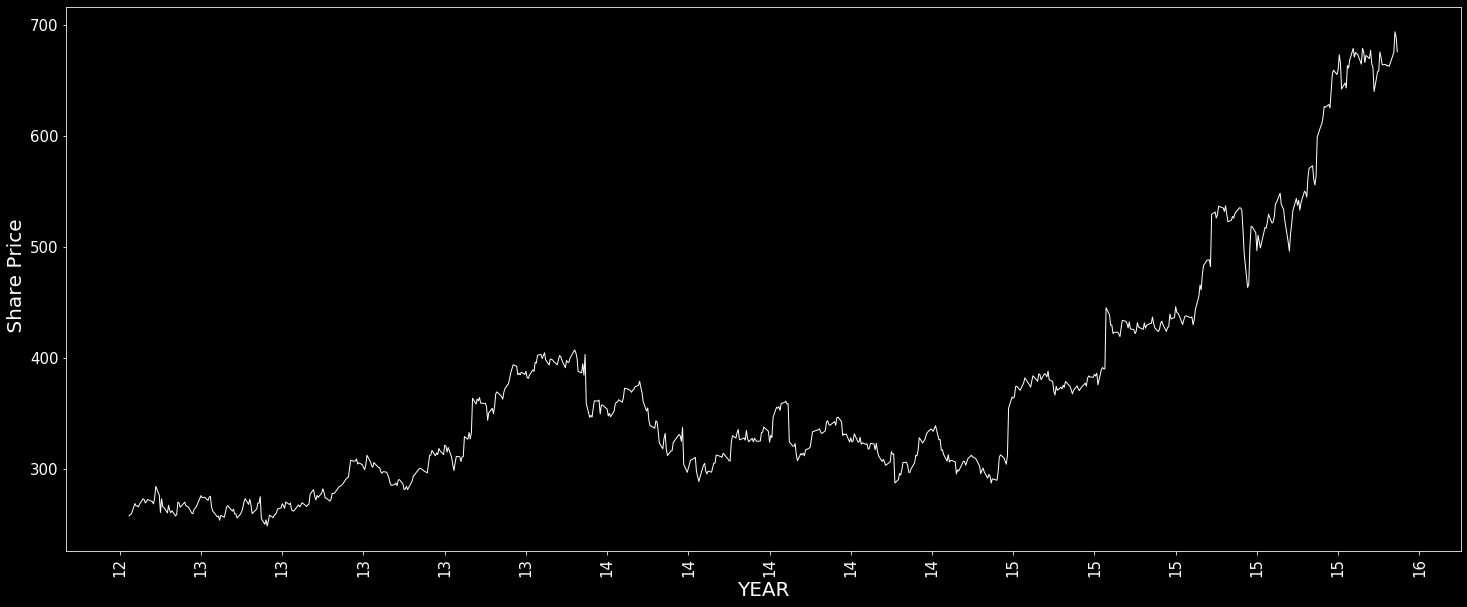

In [148]:

fig, ax = plt.subplots(figsize=(25,10))
plt.style.use('dark_background')
ax.plot(AMZN_df["Adj Close"],linewidth=1,color='white')

plt.xlabel('YEAR', fontsize=20)

plt.ylabel(' Share Price',fontsize=20)

# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
ax.xaxis.set_major_formatter(DateFormatter("%y"))
plt.xticks(rotation=90)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.show()

## Valume ( # transactions for each day)

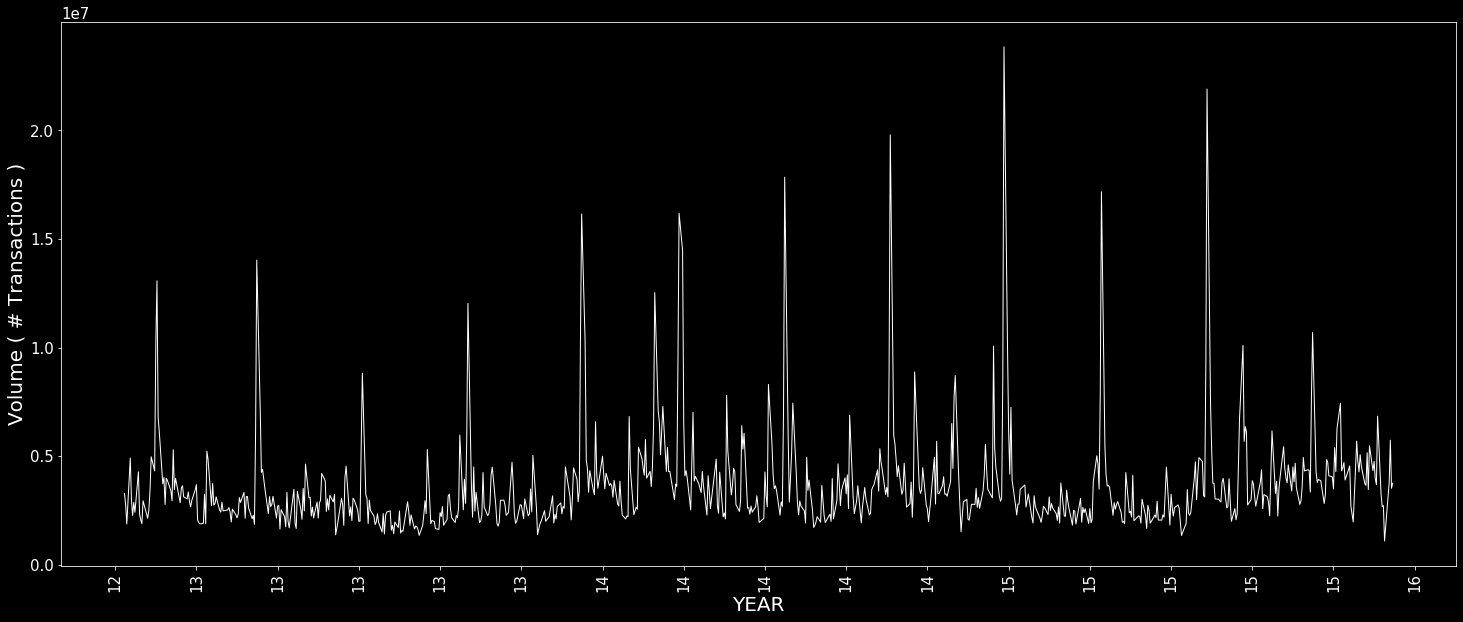

In [155]:

fig, ax = plt.subplots(figsize=(25,10))
plt.style.use('dark_background')
ax.plot(AMZN_df["Volume"],linewidth=1,color='white')

plt.xlabel('YEAR', fontsize=20)

plt.ylabel('Volume ( # Transactions )',fontsize=20)

# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
ax.xaxis.set_major_formatter(DateFormatter("%y"))
plt.xticks(rotation=90)


plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.show()

## Top 10 spikes in the volume above 

In [165]:
AMZN_df_spike = AMZN_df.nlargest(10, ['Volume']) 
AMZN_df_spike

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2015-01-30,2015-01-30,346.320007,359.500000,340.739990,354.529999,354.529999,23856100
2015-07-24,2015-07-24,578.989990,580.570007,529.349976,529.419983,529.419983,21909400
2014-10-24,2014-10-24,284.399994,293.809998,284.000000,287.059998,287.059998,19801100
2014-07-25,2014-07-25,317.299988,324.869995,314.760010,324.010010,324.010010,17846500
2015-04-24,2015-04-24,439.000000,452.649994,439.000000,445.100006,445.100006,17176900
2014-04-25,2014-04-25,316.250000,316.489990,302.709991,303.829987,303.829987,16180200
2014-01-31,2014-01-31,371.760010,375.450012,357.760010,358.690002,358.690002,16154800
2014-04-28,2014-04-28,304.000000,304.390015,288.000000,296.579987,296.579987,14479800
2013-04-26,2013-04-26,269.970001,272.019989,252.809998,254.809998,254.809998,14030000


## Calcuating the change in the share price of Amazon during the spikes 

In [169]:
AMZN_df_spike["perc_change_share_price"] = (abs(AMZN_df_spike["Adj Close"] - AMZN_df_spike["Open"]  ) / AMZN_df_spike["Open"])*100


In [170]:
AMZN_df_spike

,Date,Open,High,Low,Close,Adj Close,Volume,perc_change_share_price
Date,,,,,,,,
2015-01-30,2015-01-30,346.320007,359.500000,340.739990,354.529999,354.529999,23856100,2.370638
2015-07-24,2015-07-24,578.989990,580.570007,529.349976,529.419983,529.419983,21909400,8.561462
2014-10-24,2014-10-24,284.399994,293.809998,284.000000,287.059998,287.059998,19801100,0.935304
2014-07-25,2014-07-25,317.299988,324.869995,314.760010,324.010010,324.010010,17846500,2.114725
2015-04-24,2015-04-24,439.000000,452.649994,439.000000,445.100006,445.100006,17176900,1.389523
2014-04-25,2014-04-25,316.250000,316.489990,302.709991,303.829987,303.829987,16180200,3.927277
2014-01-31,2014-01-31,371.760010,375.450012,357.760010,358.690002,358.690002,16154800,3.515711
2014-04-28,2014-04-28,304.000000,304.390015,288.000000,296.579987,296.579987,14479800,2.440794
2013-04-26,2013-04-26,269.970001,272.019989,252.809998,254.809998,254.809998,14030000,5.615440


## 5+ percentage points of change seems high to me